# Introduction

![Home Depot](https://i.imgur.com/bVbLvm9.jpeg)

**Home Credit** B.V. is an international non-bank financial institution founded in 1997 in the Czech Republic and headquartered in Netherlands. The company operates in 9 countries and focuses on installment lending primarily to people with little or no credit history. [Source](https://en.wikipedia.org/wiki/Home_Credit)

Over 22 years of track record, they have accumulated a large amount of borrower behavioural data which they leverage to provide financial assistance to such customers. They have built predictive models that help them to efficiently analyze the risk associated with a given client and also estimate the safe credit amount to be lent to customers, even with no credit history.

## Data

### Overview

The dataset provided contains a vast number of details about the borrower. It is separated into several relational tables, which contain applicants’ static data such as their gender, age, number of family members, occupation, and other necessary fields, applicant’s previous credit history obtained from the credit bureau department, and the applicant’s past credit history within the Home Credit Group itself. The dataset is an imbalanced dataset, where the negative class dominates the positive class, as there are only a few number of defaulters among all the applicants.

### Data Description

![Data_dependencies](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

**application_{train|test}.csv**

* This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

**bureau.csv**

* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**bureau_balance.csv**

* Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**POS_CASH_balance.csv**

* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**credit_card_balance.csv**

* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**previous_application.csv**

* All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.

**installments_payments.csv**

* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. There is a) one row for every payment that was made plus b) one row each for missed payment. One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**HomeCredit_columns_description.csv**]

* This file contains descriptions for the columns in the various data files.

Source: Home Credit Group [Kaggle](https://www.kaggle.com/c/home-credit-default-risk/data)

## First steps


### Importing libraries and modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Functions

In [2]:
def missing_values_table(df) -> pd.DataFrame:
    """
    Counts total columns and columns with missing values.
    Print out the information in form of a string and dataframe.

    Returns:
        mis_val_table_ren_columns (pd.DataFrame):
            dataframe with count of missing values and percentage with respect to total values of the variable
    """
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}
    )
    mis_val_table_ren_columns = (
        mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    print(
        "Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are "
        + str(mis_val_table_ren_columns.shape[0])
        + " columns that have missing values."
    )
    return mis_val_table_ren_columns

# EDA

## Application

### Preview

Application dataset is the main data source on the applicants. In the sense of times series - the most recent.

It has many labels describing the borrower and and TARGET which indicates default/nondefault of the same borrower. Since it is very complicated to do logical and simple EDA on such many labels at the same time, this dataset will be broken down into smaller chunks given data's semantic meaning.

**Basis for variable split in application data:**
* Continuous
* Binary
* Categorical
* Normalized
* Time series
* Counts & Ratings


In [3]:
application = pd.read_csv('../home-credit-default-risk/application_train.csv')

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Continuous

In [5]:
continuous = application.iloc[:, 7:11]

In [6]:
continuous.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,202500.0,406597.5,24700.5,351000.0
1,270000.0,1293502.5,35698.5,1129500.0
2,67500.0,135000.0,6750.0,135000.0
3,135000.0,312682.5,29686.5,297000.0
4,121500.0,513000.0,21865.5,513000.0


There are barely any missing data among continuous variables.

In [7]:
missing_values_table(continuous)

Your selected dataframe has 4 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0


The most important rows to look at the description of continuous variables are max and 75% percentile differences. This suggests outliers in the data among all continuous variables.

In [8]:
continuous.apply(lambda x: x / 1000).describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.000000,307511.000000,307499.000000,307233.000000
mean,168.797919,599.026000,27.108574,538.396207
std,237.123146,402.490777,14.493737,369.446461
min,25.650000,45.000000,1.615500,40.500000
25%,112.500000,270.000000,16.524000,238.500000
50%,147.150000,513.531000,24.903000,450.000000
75%,202.500000,808.650000,34.596000,679.500000
max,117000.000000,4050.000000,258.025500,4050.000000


Kernel density estimate plot shows smoothed version of the histogram plot. Here it is clear that outliers begin at 2*1e6 and beyond. However, it is important to notice the shape of the distribution and keep that in mind later in the analysis.

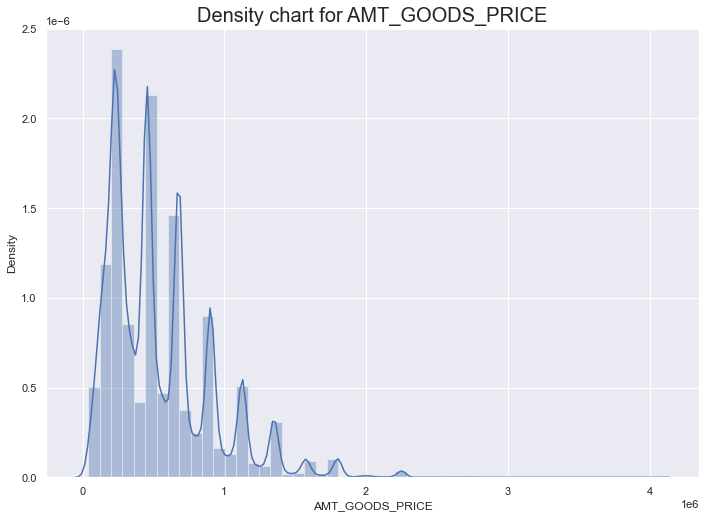

In [9]:
sns.distplot(continuous["AMT_GOODS_PRICE"])
plt.title("Density chart for AMT_GOODS_PRICE", fontsize=20)
plt.show()

```AMT_GOODS_PRICE``` could also be defined as inflation. Thus we could feature engineer a ```real_credit = amt_credit / amt_goods_price``` and use it later.

Relationship between credit and goods price shows a lot of similarities at peek times (sharpest ups and downs). This means variables might move in the same direction.

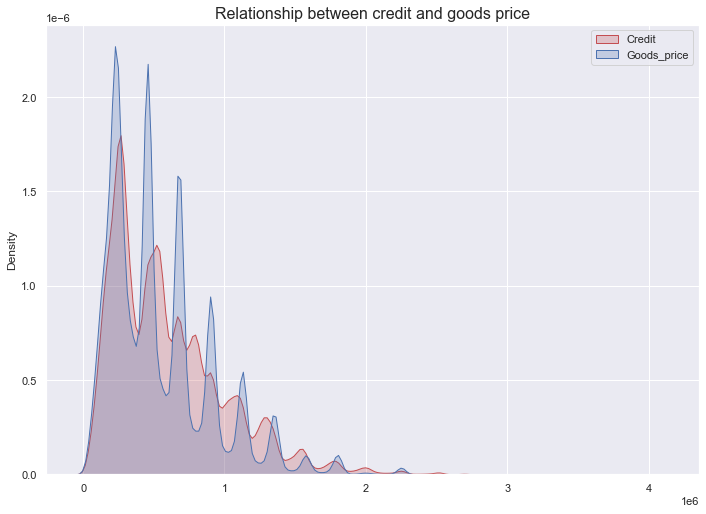

In [10]:
fig = sns.kdeplot(continuous["AMT_CREDIT"], shade=True, color="r", label="Credit")
fig = sns.kdeplot(
    continuous["AMT_GOODS_PRICE"], shade=True, color="b", label="Goods_price"
)
plt.legend()
plt.xlabel("")
plt.title("Relationship between credit and goods price", fontsize=16)
plt.show()


Boxplot of income suggests relatively large outliers, thus deeper investigation is needed.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

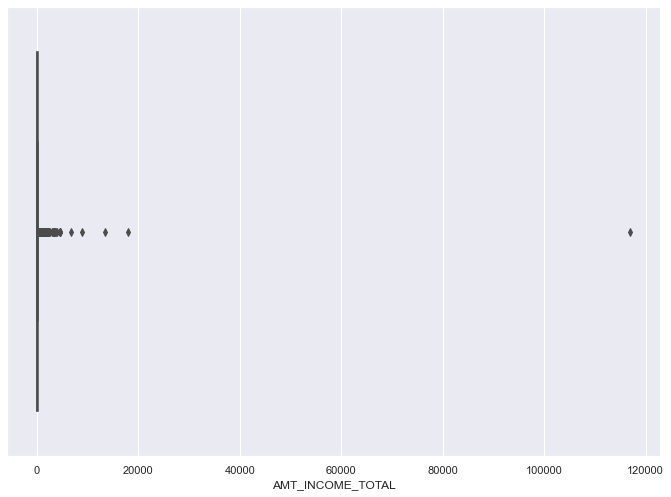

In [11]:
sns.boxplot(continuous["AMT_INCOME_TOTAL"].apply(lambda x: x / 1000))

In [12]:
continuous.AMT_INCOME_TOTAL.sort_values(ascending=False).head(5)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Exploring top5 largest income poeple to understand if data entries are correct.

Conclusion: from the preview of the data, we can see that the largest income person has defaulted on relatively small credit and annuity. This could be investigated given the supporting datasets or dropping it to decrease potential noise from the model.

In [13]:
application.sort_values(by="AMT_INCOME_TOTAL", ascending=False).head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,69295.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,132601.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0


Their credit and annuities do not seem in any way abnormal, thus we do not treat them as outliers.

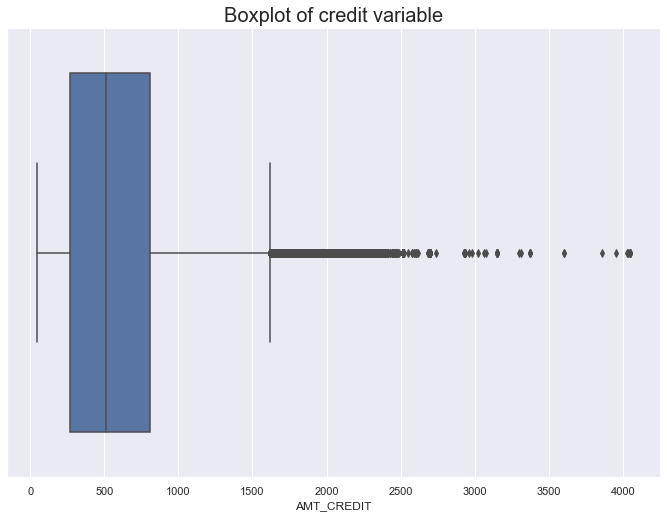

In [14]:
sns.boxplot(continuous["AMT_CREDIT"].apply(lambda x: x / 1000))
plt.title("Boxplot of credit variable", fontsize=20)
plt.show()

The amount of credit suggests that maximum amount given is 4,05 mln currency units. However, if we check the annuity column next to it, it suggests that this is very long term loan - thus the amount is justified in relation to their income.

Potential new feature: credit_multiplier = (amt_credit / amt_income_total)

In [15]:
application.sort_values(by="AMT_CREDIT", ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
133766,255139,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
287732,433294,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
186230,315893,1,Cash loans,F,N,N,0,458550.0,4027680.0,106380.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


This boxplot shows duration for the given loads in the dataset. It indicates that majority of the loans are between 15-25 years duration while the, maximum period is rougly 45 years. This could be a great feature for the modeling since risk is associated with duration of any given loan, longer duration - higher risk of default.

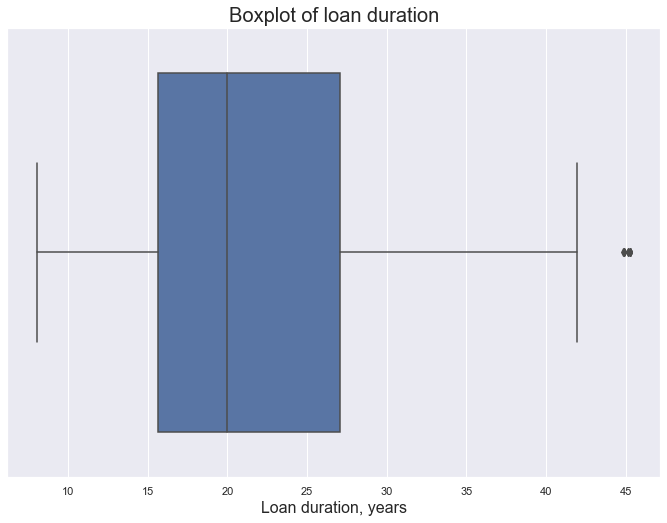

In [16]:
sns.boxplot(continuous["AMT_CREDIT"] / continuous["AMT_ANNUITY"])
plt.title("Boxplot of loan duration", fontsize=20)
plt.xlabel("Loan duration, years", fontsize=16)
plt.show()

### Binary

The application dataset contains quite a few binary variables with 0 or 1 values representing 'no' and 'yes'. I will sort them out and check for missing values.

In [17]:
application_numeric = application.select_dtypes(include="number")
binary_columns = [
    col
    for col in application_numeric
    if (len(application_numeric[col].value_counts()) > 0)
    & all(application_numeric[col].value_counts().index.isin([0, 1]))
]
binary = application_numeric[binary_columns]

In [18]:
binary.head()

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
missing_values_table(binary)

Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


This part of the dataset does not have any missing values.

For feature engineering, use summation for different binary features.
For example, total count of flagged documents per application.



Also, binary features do not have any columns which are fully represented by only one value.

### Categorical

In [20]:
categorical = application.select_dtypes(exclude='number')

In [21]:
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


Gender distribution chart suggests either a mislabelling or non-binary gender entry (depends on bank here).

However, for the purpose of this project, 'XNA' will be treated as mislabelling.

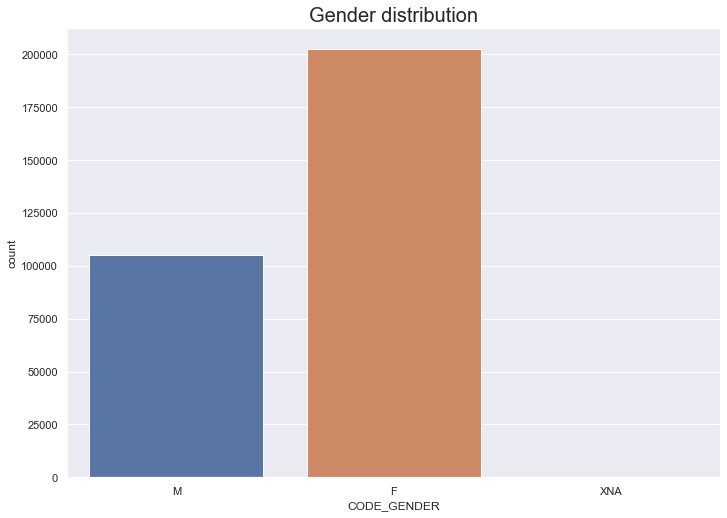

In [22]:
sns.countplot(x=categorical["CODE_GENDER"])
plt.title("Gender distribution", fontsize=20)
plt.show()

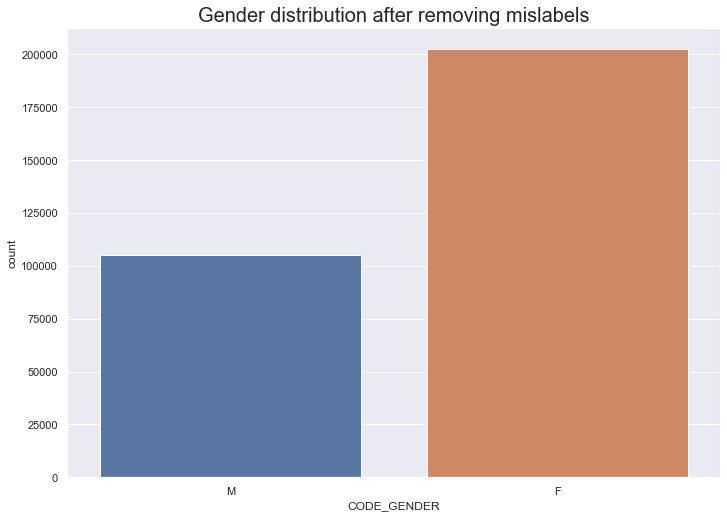

In [23]:
categorical['CODE_GENDER'].replace('XNA', np.nan, inplace=True)
sns.countplot(x=categorical["CODE_GENDER"])
plt.title("Gender distribution after removing mislabels", fontsize=20)
plt.show()

The least defaulting people by education are the ones who have an academic degree. On the other hand, the people who have defaulted the most given their degree - lower secondary graduates*

\* lower secondary is also known as second stage of basic education. In Lithuania it would be consider as finishing 1-8 grades.

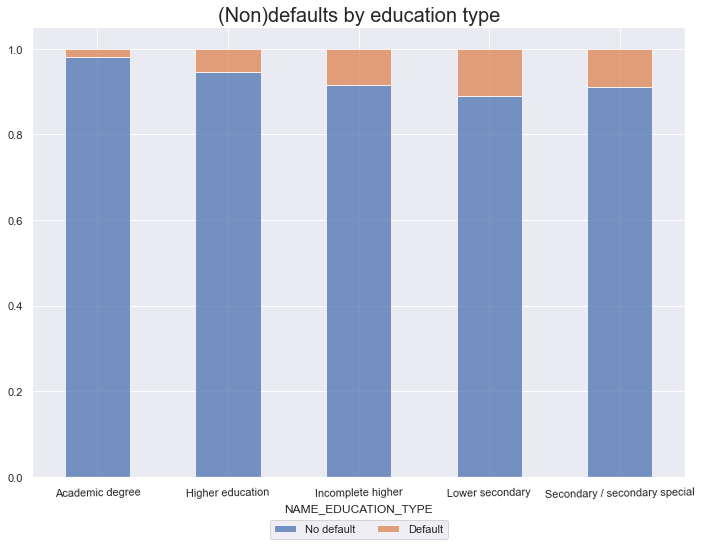

In [24]:
pd.crosstab(
    application["NAME_EDUCATION_TYPE"], application["TARGET"], normalize="index"
).plot.bar(stacked=True, alpha=0.75, rot=1)
plt.legend(
    labels=["No default", "Default"],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
)
plt.title("(Non)defaults by education type", fontsize=20)
plt.show()


Based on income type, it is clear that there were none (or almost) businessman who have defaulted on their loans.

However, the majority of the defaults are split between people who are on maternity leave or unemployed.

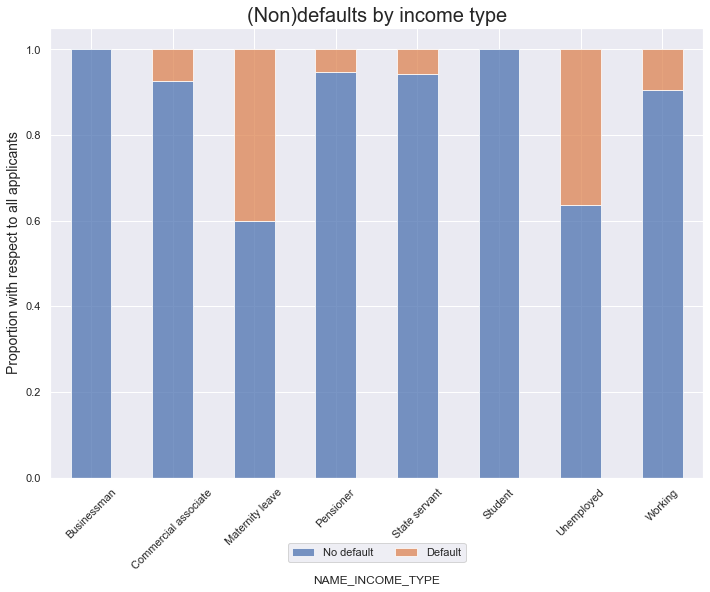

In [25]:
pd.crosstab(
    application["NAME_INCOME_TYPE"], application["TARGET"], normalize="index"
).plot.bar(stacked=True, alpha=0.75, rot=1)
plt.legend(
    labels=["No default", "Default"],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=2,
)
plt.xticks(rotation=45)
plt.ylabel("Proportion with respect to all applicants", fontsize=14)
plt.title("(Non)defaults by income type", fontsize=20)
plt.show()

Defaults by occupation are more or less similar across occupation types with only one exception - low skilled laborers. From all of the low skilled laborers rougly 20% of them have defaulted on their loans. This could be explored by the bank to understand the reasoning behind the defaults, they could be such as considereable too high credit given their income or non-truthful information given on the application.

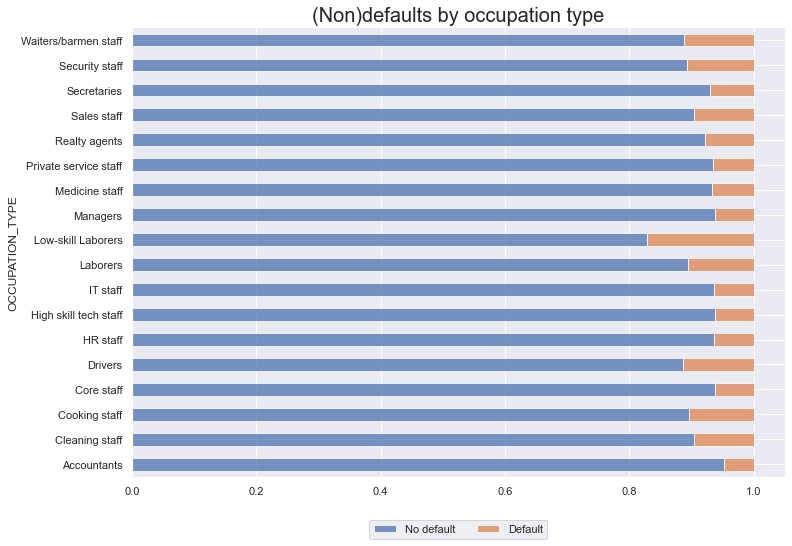

In [26]:
pd.crosstab(
    application["OCCUPATION_TYPE"], application["TARGET"], normalize="index"
).plot.barh(stacked=True, alpha=0.75, rot=0)
plt.legend(
    labels=["No default", "Default"],
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
)
plt.title("(Non)defaults by occupation type", fontsize=20)
plt.show()


Insights from the heatmap:

* Lower secondary degree (from analysis above) is not focused on one occupation type, thus they could be unemployed or spread out across all of them
* Low skill laborers shows that there is no concentration of specific education type among them.

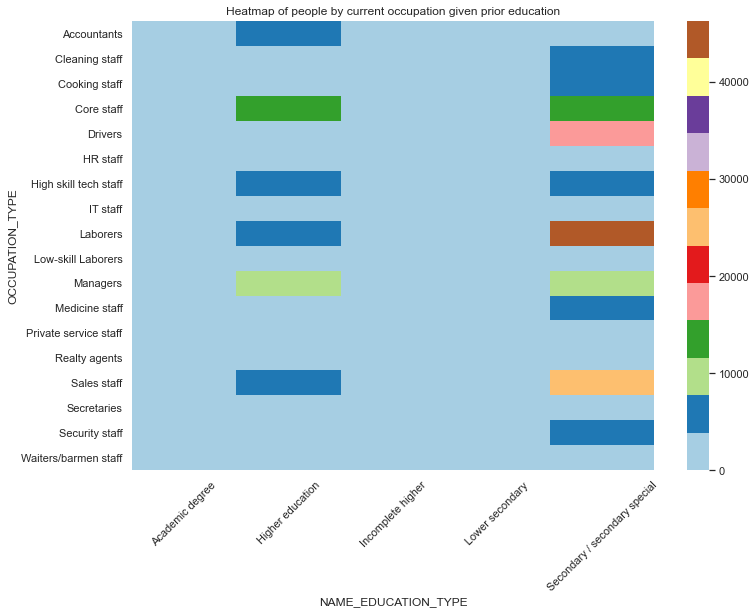

In [27]:
sns.heatmap(
    pd.crosstab(application.OCCUPATION_TYPE, application.NAME_EDUCATION_TYPE),
    cmap="Paired",
)
plt.xticks(rotation=45)
plt.title("Heatmap of people by current occupation given prior education")
plt.show()


There are some of the features, such as ```gender```, ```owning a car```, ```owning real estate``` are presented as categorical when in fact they represent binary data. 

Most of the missing values in categorical part of the dataset has come from normalized sources.

In [28]:
missing_values_table(categorical)

Your selected dataframe has 16 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4
CODE_GENDER,4,0.0


Further, it is important to see the count of classes for each categorical variable. This specifically is important for dimensionality when later on performing ```one-hot-encoding``` on this data.

It is observable that ```ORGANIZATION_TYPE``` has significantly more classes than other variables and would explode dimensionality for later training. Considering these datasets are aleardy quite large it is detrimental to reduce the class frequency (at least for organization_type)

In [29]:
categorical.nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

The frequencies of ORGANIZATION_TYPE presented below:

In [30]:
pd.DataFrame(
    categorical["ORGANIZATION_TYPE"]
    .value_counts()
    .apply(lambda x: (x / categorical["ORGANIZATION_TYPE"].shape[0]) * 100)
    .head(15)
    .rename("% " + "from total count")
)

,% from total count
Business Entity Type 3,22.110429
XNA,18.007161
Self-employed,12.491260
Other,5.425172
Medicine,3.639870
Business Entity Type 2,3.431747
Government,3.383294
School,2.891929
Trade: type 7,2.546576
Kindergarten,2.237318


Here, it has been chose that the ```threshold of 2%``` will be implemented (personal judgement). This choice has been made with an idea of keeping cardinality at reasonable range. 

In [31]:
frequencies = categorical["ORGANIZATION_TYPE"].value_counts(normalize=True)
mapping = categorical["ORGANIZATION_TYPE"].map(frequencies)
categorical["ORGANIZATION_TYPE"].mask(mapping < 0.02, "Other_2", inplace=True)

After reducing the cardinality, there are left 12 categories for organization type which is comparable with the rest.

In [32]:
pd.DataFrame(
    categorical["ORGANIZATION_TYPE"]
    .value_counts()
    .apply(lambda x: (x / categorical["ORGANIZATION_TYPE"].shape[0]) * 100)
    .head(15)
    .rename("% " + "from total count")
)

,% from total count
Business Entity Type 3,22.110429
Other_2,21.649632
XNA,18.007161
Self-employed,12.491260
Other,5.425172
Medicine,3.639870
Business Entity Type 2,3.431747
Government,3.383294
School,2.891929
Trade: type 7,2.546576


### Normalized

In [33]:
normalized = application.iloc[:, np.r_[16:17, 41:86, 88:89]].copy()

In [34]:
normalized.head()

,REGION_POPULATION_RELATIVE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE
0,0.018801,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149
1,0.003541,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714
2,0.010032,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.008019,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.028663,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a lot of missing values among the normalized variables.

In this project I will not handle those missing values in any special treatment, however, by my research I have seen that you could implement missing values imputer by training a machine learning model, such as XGBRegressor to learn and impute the missing values to have potential gain in overall model's performance.

In [35]:
missing_values_table(normalized).head(10)

Your selected dataframe has 47 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_AVG,208642,67.8


The only unusual feautures are EXT_SOURCE_(1-3), thus I will explore their impact on the target by checking correlation coefficients.

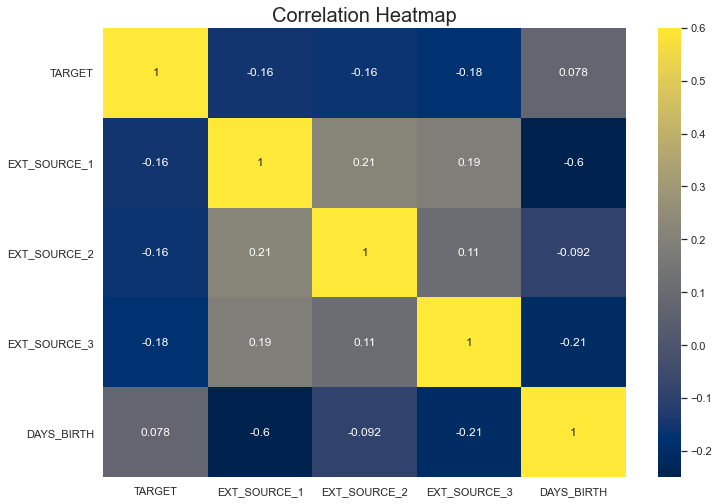

In [36]:
ext_data = application[
    ["TARGET", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH"]
]

sns.heatmap(ext_data.corr(), cmap="cividis", vmin=-0.25, annot=True, vmax=0.6)
plt.title("Correlation Heatmap", fontsize=20)
plt.yticks(rotation=0)
plt.show()


From the first row it is clear that all three external sources have weak negative correlation with the target. This means that the increase in the any of those variables will have slight reduction in the probability of default for the client.

These external sources could be used for polynomial feature engineering as well, since we do not have any information on semantic meaning of them. Polynomial features will be created during the feature engineering stage.

### Time

In [37]:
time = application.iloc[:, np.r_[17:22, 33:34, 95:96]].copy()

Negative dyas represent counting from the current days. For instance, "Days from today this person has been born (-10000)".

In [38]:
time.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,NaN,10,-1134.0
1,-16765,-1188,-1186.0,-291,NaN,11,-828.0
2,-19046,-225,-4260.0,-2531,26.0,9,-815.0
3,-19005,-3039,-9833.0,-2437,NaN,17,-617.0
4,-19932,-3038,-4311.0,-3458,NaN,11,-1106.0


In [39]:
missing_values_table(time)

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
OWN_CAR_AGE,202929,66.0
DAYS_LAST_PHONE_CHANGE,1,0.0


Below cell suggests that dropping all missing values and looking at the people who do not have a car returns 0 rows, consequently the conclusion is drawn that missing values in ```OWN_CAR_AGE``` represent people who do not own a car.

In [40]:
application[["OWN_CAR_AGE", "FLAG_OWN_CAR"]].dropna().loc[
    application["FLAG_OWN_CAR"] == "N"
]

,OWN_CAR_AGE,FLAG_OWN_CAR


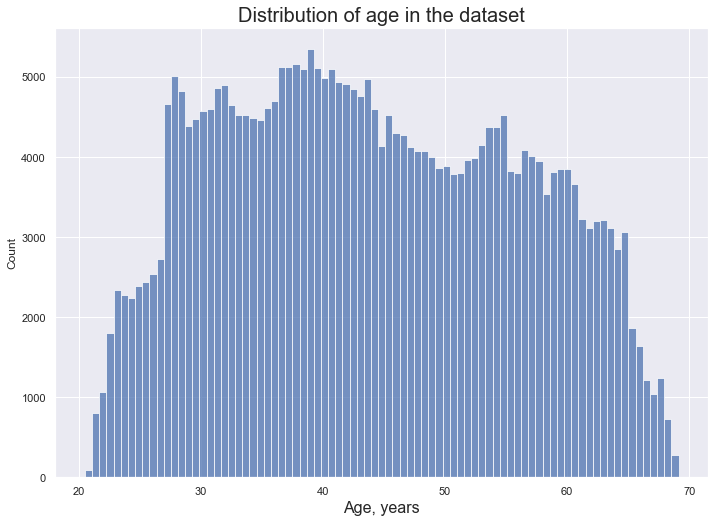

In [41]:
sns.histplot(time["DAYS_BIRTH"].apply(lambda x: x / (-365)))
plt.xlabel("Age, years", fontsize=16)
plt.title("Distribution of age in the dataset", fontsize=20)
plt.show()

Age of the applicants seems to be normal and does not show any significant anomalies from the histplot and statistical description.

In [42]:
time["DAYS_BIRTH"].apply(lambda x: x / (-365)).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

To be sure, let's see how the loan duration corresponds to the age of the applicant.


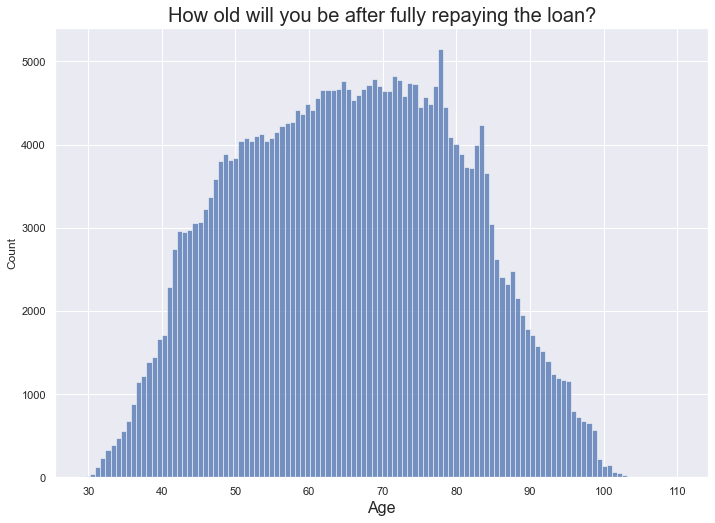

In [43]:
sns.histplot(
    application["DAYS_BIRTH"].apply(lambda x: x / (-365))
    + (application["AMT_CREDIT"] / application["AMT_ANNUITY"])
)
plt.xlabel("Age", fontsize=16)
plt.title("How old will you be after fully repaying the loan?", fontsize=20)
plt.show()

What happens if you die before repaying the loan?

Why the maximum age with credit years does not stop at retirying age, for instance 65-70? Could there be any unreasonble policies allowing this?

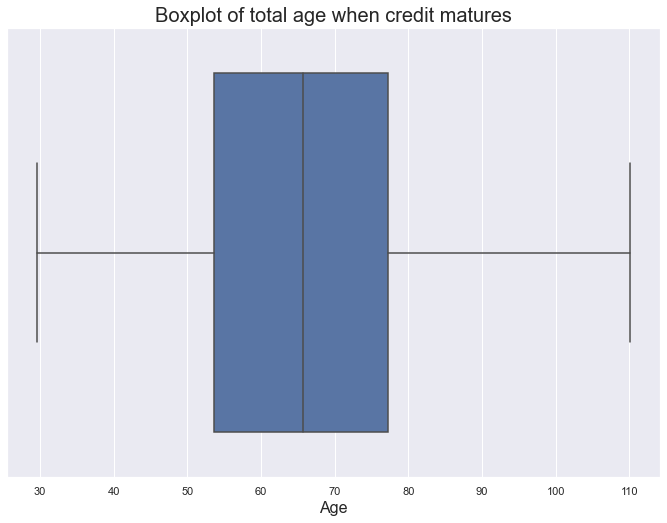

In [44]:
sns.boxplot(
    application["DAYS_BIRTH"].apply(lambda x: x / (-365))
    + (application["AMT_CREDIT"] / application["AMT_ANNUITY"])
)
plt.title("Boxplot of total age when credit matures", fontsize=20)
plt.xlabel("Age", fontsize=16)
plt.show()

Failure to repay the loan by age group is very clear. It could be described as negative relationship between age and total defaults. This means that young people are more risky whereas old ones are less risky in terms of defaults.

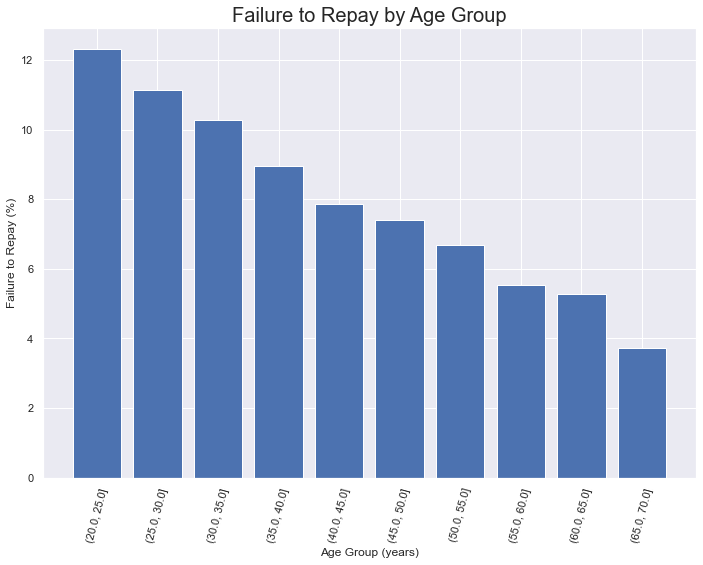

In [45]:
application["YEARS_BIRTH"] = application["DAYS_BIRTH"] / (-365)
application["YEARS_BINNED"] = pd.cut(
    application["YEARS_BIRTH"], bins=np.linspace(20, 70, num=11)
)
age_groups = application.groupby("YEARS_BINNED").mean()

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups["TARGET"])
plt.xticks(rotation=75)
plt.xlabel("Age Group (years)")
plt.ylabel("Failure to Repay (%)")
plt.title("Failure to Repay by Age Group", fontsize=20)
plt.show()

Extreme outlier detected by histogram in DAYS_EMPLOYED variable.

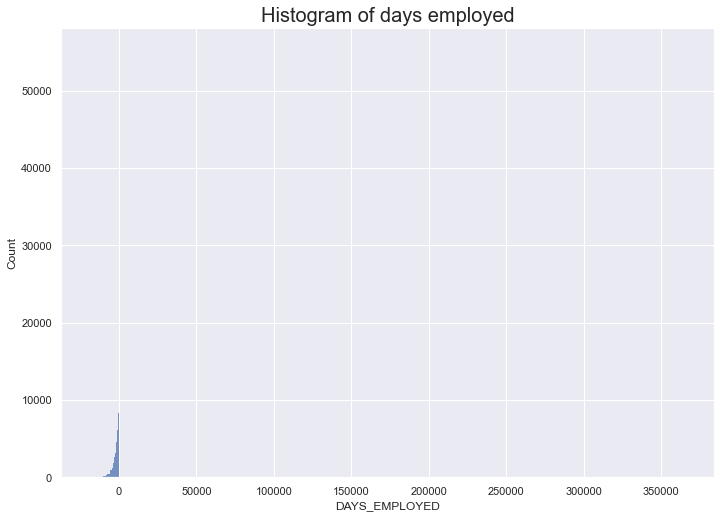

In [46]:
sns.histplot(time["DAYS_EMPLOYED"])
plt.title("Histogram of days employed", fontsize=20)
plt.show()

In [47]:
time["DAYS_EMPLOYED"].loc[time["DAYS_EMPLOYED"] > 300000]

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

There seems to be quite a few entries (55374) of this anomaly, thus replacing it as a missing value should be a good solution for now.

In [48]:
time["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

After removing extreme outliers, the histrogram and statistical description shows much more reasonable distribution of DAYS_EMPLOYED.

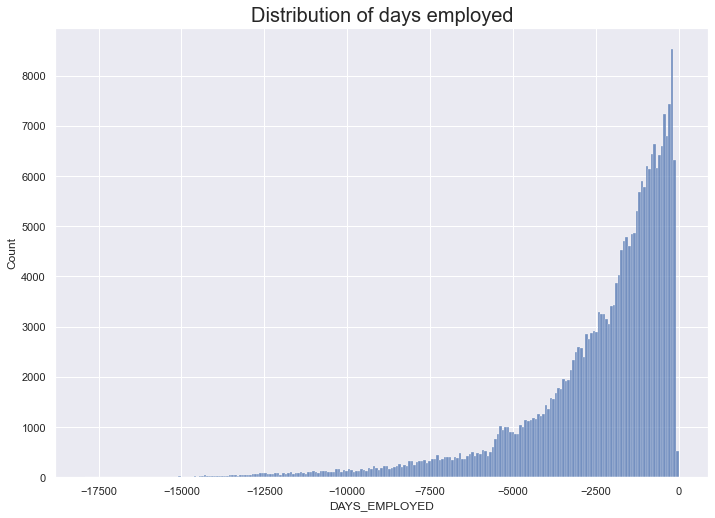

In [49]:
sns.histplot(time["DAYS_EMPLOYED"])
plt.title("Distribution of days employed", fontsize=20)
plt.show()

In [50]:
time["DAYS_EMPLOYED"].apply(lambda x: x / (-365)).describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

Majority of borrowers have worked less than 10 year, while the largest employment year are going as high as 50.

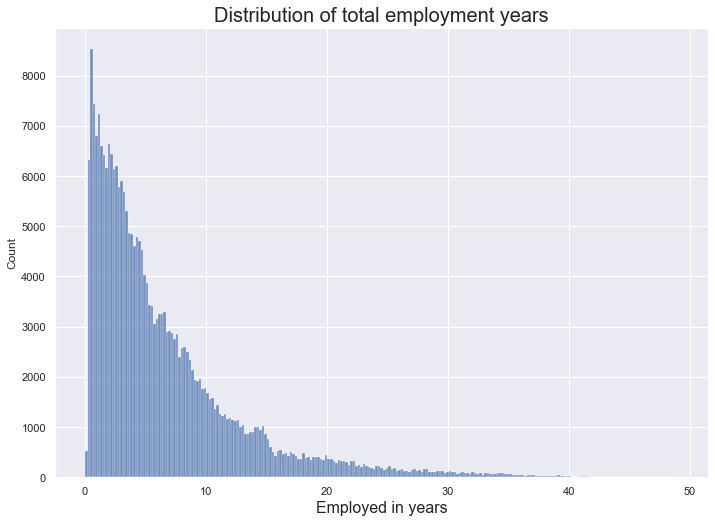

In [51]:
sns.histplot(time["DAYS_EMPLOYED"].apply(lambda x: x / (-365)))
plt.xlabel('Employed in years', fontsize=16)
plt.title("Distribution of total employment years", fontsize=20)
plt.show()

Everything seems reasonable, except few outliers from 50 to 70.

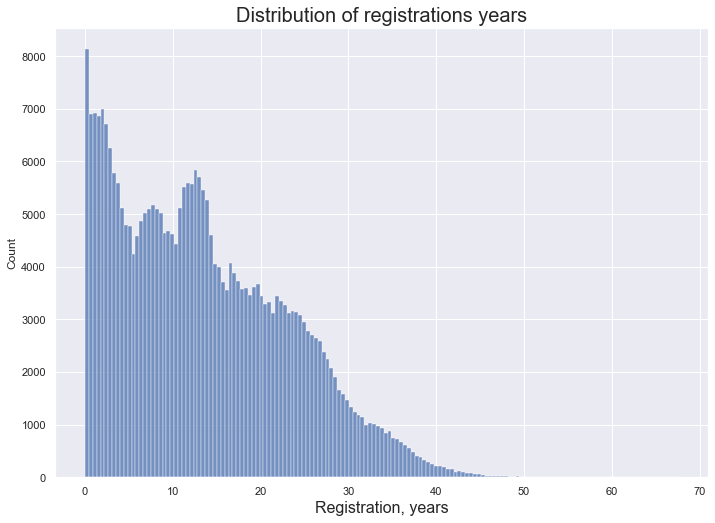

In [52]:
sns.histplot(time["DAYS_REGISTRATION"].apply(lambda x: x / (-365)))
plt.xlabel("Registration, years", fontsize=16)
plt.title("Distribution of registrations years", fontsize=20)
plt.show()

Boxplot of registration years shows outliers more precisely.

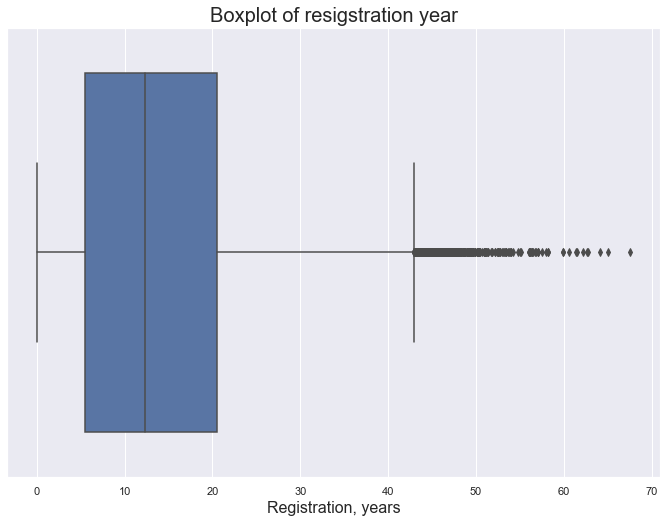

In [53]:
sns.boxplot(time["DAYS_REGISTRATION"].apply(lambda x: x / (-365)))
plt.xlabel("Registration, years", fontsize=16)
plt.title("Boxplot of resigstration year", fontsize=20)
plt.show()

Density plots suggests that there is quite a spike of cars over 60 years old. Could they be ```collections car's```?

To confirm or deny this thesis I compared people's income mean/median with own car age.

**Conclusion:** cars older than 40 years only have significantly higher standard deviation, however, both mean and median does not suggest that people who own much older cars have higher income. Thus based on income of people who own the cars - there is no exclusivity to the ones aged > 60.

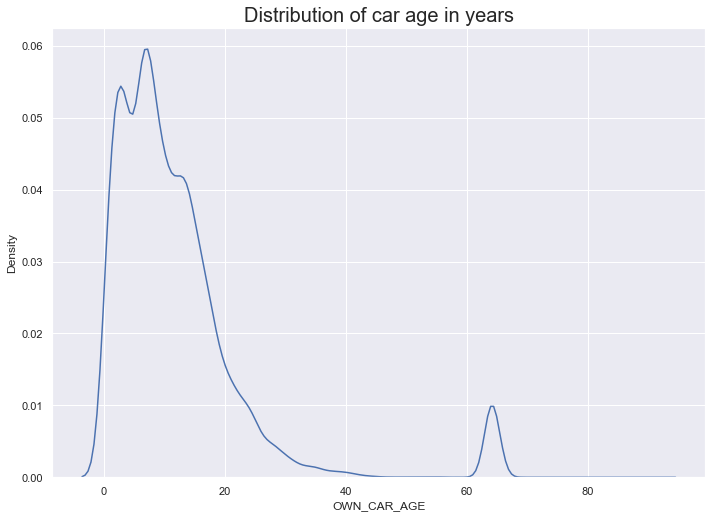

In [54]:
sns.kdeplot(time["OWN_CAR_AGE"])
plt.title("Distribution of car age in years", fontsize=20)
plt.show()

Huge spike around 0 years, this could mean a lot of different things which is hard to answer just from numerical data.

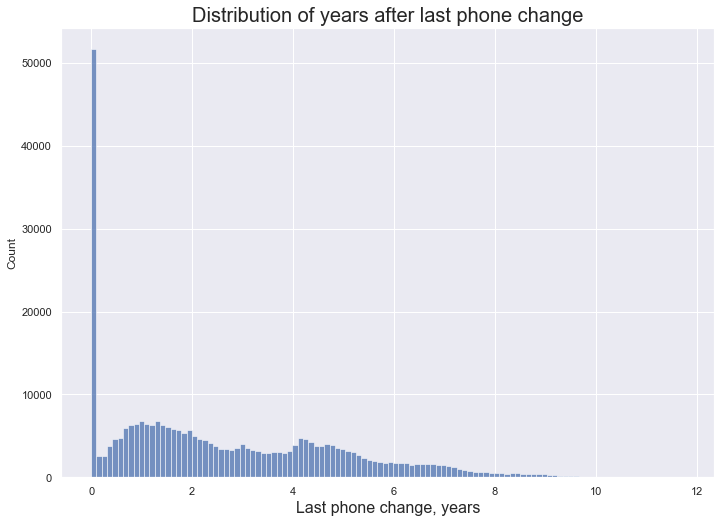

In [55]:
sns.histplot(time["DAYS_LAST_PHONE_CHANGE"].apply(lambda x: (x / (-365))))
plt.xlabel("Last phone change, years", fontsize=16)
plt.title('Distribution of years after last phone change', fontsize=20)
plt.show()

### Counts & Ratings

In [56]:
count = application.iloc[:, np.r_[6:7, 29:32, 91:95, 116:122]].copy()

In [57]:
count.head()

,CNT_CHILDREN,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1.0,2,2,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,2.0,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.0,2,2,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No significant amount of missing values have been noticed, however, most of them are coming from ```BUREAU``` which is an external data provider for Home Depot.

In [58]:
missing_values_table(count)

Your selected dataframe has 14 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3


The most important column for the statistical description is ```max``` since this one shows our outlier in comparison with 75 percentile. Extreme outliers will be removed in the next stage of this project - data preparation and feature engineering.

In [59]:
count.describe().round().T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,0.0,1.0,0.0,0.0,0.0,1.0,19.0
CNT_FAM_MEMBERS,2.0,1.0,1.0,2.0,2.0,3.0,20.0
REGION_RATING_CLIENT,2.0,1.0,1.0,2.0,2.0,2.0,3.0
REGION_RATING_CLIENT_W_CITY,2.0,1.0,1.0,2.0,2.0,2.0,3.0
OBS_30_CNT_SOCIAL_CIRCLE,1.0,2.0,0.0,0.0,0.0,2.0,348.0
DEF_30_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,34.0
OBS_60_CNT_SOCIAL_CIRCLE,1.0,2.0,0.0,0.0,0.0,2.0,344.0
DEF_60_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,24.0
AMT_REQ_CREDIT_BUREAU_HOUR,0.0,0.0,0.0,0.0,0.0,0.0,4.0
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,0.0,0.0,0.0,9.0


Given the count of children and count of family members, scatterplot presents that variables move in the same direction as expected by the logic.

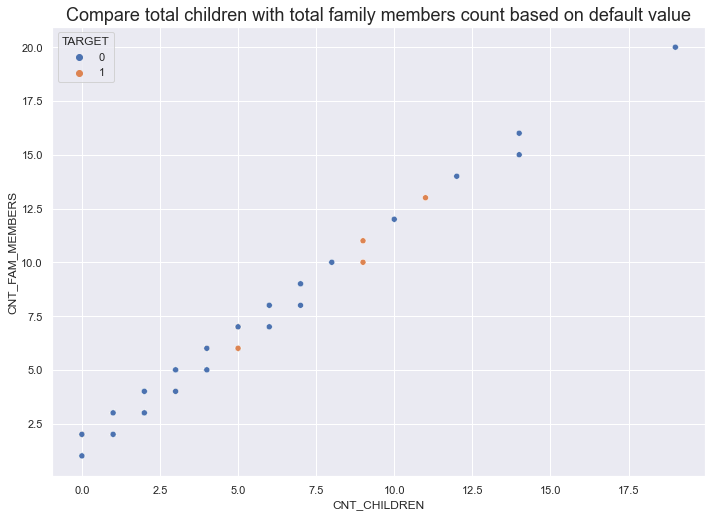

In [60]:
sns.scatterplot(
    x="CNT_CHILDREN", y="CNT_FAM_MEMBERS", hue=application["TARGET"], data=count
)
plt.title(
    "Compare total children with total family members count based on default value",
    fontsize=18,
)
plt.show()

How can you have 19 children at age 28-30? Could it be adoption?

In [61]:
high_count_children = application.loc[application['CNT_CHILDREN'] > 15]

In [62]:
high_count_children['DAYS_BIRTH'] / (-365)

155369    30.293151
265784    28.210959
Name: DAYS_BIRTH, dtype: float64

It seems that having extra family member besides children does not influence default probability significantly.

This could be an additional variable for marital status of a person, check with ```categorical["NAME_FAMILY_STATUS"]``` for correlation.

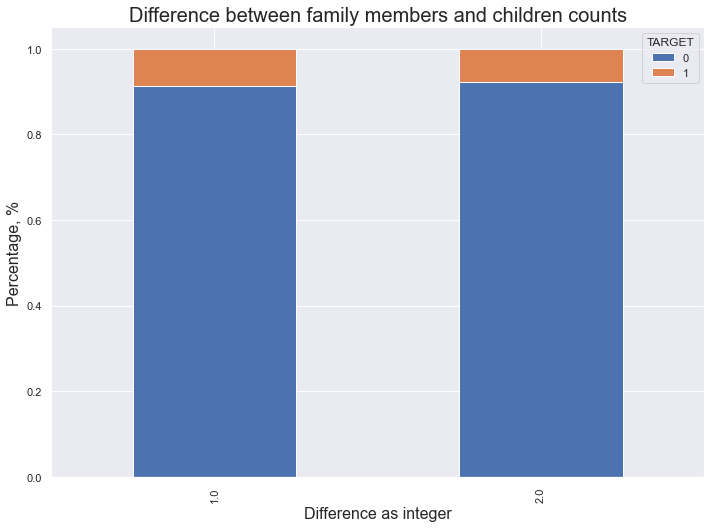

In [63]:
pd.crosstab(
    application["CNT_FAM_MEMBERS"] - application["CNT_CHILDREN"],
    application["TARGET"],
    normalize="index",
).plot.bar(stacked=True)
plt.title("Difference between family members and children counts", fontsize=20)
plt.ylabel("Percentage, %", fontsize=16)
plt.xlabel("Difference as integer", fontsize=16)
plt.show()

## Previous application

This table contains the static data of the previous loan which the client had with Home Credit.

In [64]:
previous_application = pd.read_csv('../home-credit-default-risk/previous_application.csv')

In [65]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Statistical table for numerical to find extreme outliers or unusual values in the dataset.

This is rather an important step since previous_application dataframe has multiple entries for a single borrower. This presents a challenge for usage of this data, thus mostly aggregations will be used. That is the reason why statistical table is a quick and powerful step.

In [66]:
previous_application.select_dtypes(include='number').describe().iloc[1:, 2:].round().T

,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,15955.0,14782.0,0.0,6322.0,11250.0,20658.0,418058.0
AMT_APPLICATION,175234.0,292780.0,0.0,18720.0,71046.0,180360.0,6905160.0
AMT_CREDIT,196114.0,318575.0,0.0,24160.0,80541.0,216418.0,6905160.0
AMT_DOWN_PAYMENT,6697.0,20921.0,-1.0,0.0,1638.0,7740.0,3060045.0
AMT_GOODS_PRICE,227847.0,315397.0,0.0,50841.0,112320.0,234000.0,6905160.0
HOUR_APPR_PROCESS_START,12.0,3.0,0.0,10.0,12.0,15.0,23.0
NFLAG_LAST_APPL_IN_DAY,1.0,0.0,0.0,1.0,1.0,1.0,1.0
RATE_DOWN_PAYMENT,0.0,0.0,-0.0,0.0,0.0,0.0,1.0
RATE_INTEREST_PRIMARY,0.0,0.0,0.0,0.0,0.0,0.0,1.0
RATE_INTEREST_PRIVILEGED,1.0,0.0,0.0,1.0,1.0,1.0,1.0


**Conclusion** from a statistical table:
* Extremely large maximum values for annuity, application ask, credit, down payment, and goods price. In comparison to 75 percentile those could be considered as outlier if the count of those extreme values is not significantly large to show a pattern.
* ```AMT_DOWN_PAYMENT``` calculation is a difference between amount asked on the application and the credit given by the bank. Negative ```AMT_DOWN_PAYMENT``` has been noticed twice when the bank gave more money than the customer asked on their application.
* Outlier for ```SELLERPLACE_AREA``` of 4mln.
* Time series variables (starts with DAYS_) have unusual value of 365243 while it should only contain negative values since it represents time back to the past from the day of the application.

Exploring AMT_DOWN_PAYMENT negative values it is clear that bank has given a bigger loan than asked on application. However, this amount is rather small and could be considered insignificant or replaced with 0.

In [67]:
previous_application.loc[previous_application["AMT_DOWN_PAYMENT"] < 0]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
368107,1284109,350530,Consumer loans,7866.090,71580.60,71581.5,-0.90,71580.60,SATURDAY,13,...,Connectivity,10.0,low_normal,POS mobile without interest,365243.0,-459.0,-189.0,-189.0,-185.0,0.0
1519595,1817983,133068,Consumer loans,3595.545,32719.05,32719.5,-0.45,32719.05,SUNDAY,13,...,Connectivity,10.0,low_normal,POS mobile without interest,365243.0,-430.0,-160.0,-430.0,-415.0,0.0


Replacing down payment negative values with 0.

In [68]:
previous_application["AMT_DOWN_PAYMENT"] = np.where(
    previous_application["AMT_DOWN_PAYMENT"] < 0,
    0,
    previous_application["AMT_DOWN_PAYMENT"],
)

Boxplot of seller place area shows that while ignoring the max values (4mln area units) there are still quite a few oultiers but not as close to 4mln.

However, dropping all outliers above 50000 did not change the mean significantly, it only reduced it from 314 to roughly 300. Therefore, 5% change is not sufficient enough to drop the outliers for this feature considering the size of the dataset.

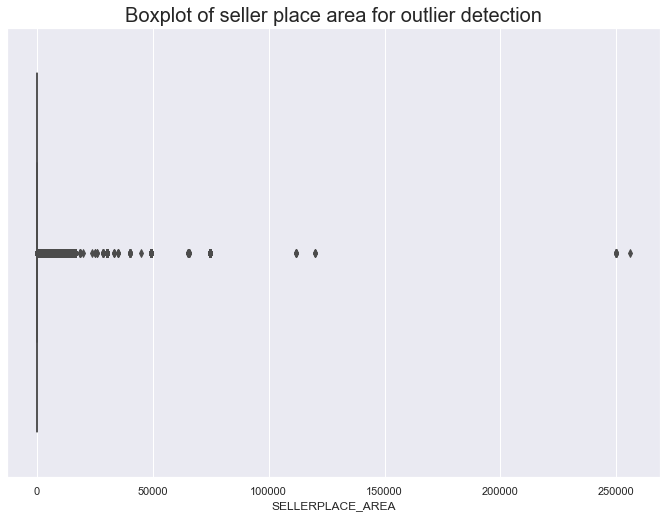

In [69]:
sns.boxplot(
    x=previous_application["SELLERPLACE_AREA"].loc[
        previous_application["SELLERPLACE_AREA"] < 4000000
    ]
)
plt.title("Boxplot of seller place area for outlier detection", fontsize=20)
plt.show()

All unusual values of 365243 days is replaced as a missing value.

In [70]:
previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

Seems like replacing the outlier among time series features gives us much more accurate descriptive statistics.

In [71]:
previous_application.describe().round().iloc[:, 15:20].T

,count,mean,std,min,25%,50%,75%,max
DAYS_FIRST_DRAWING,62705.0,-1035.0,923.0,-2922.0,-1721.0,-621.0,-303.0,-2.0
DAYS_FIRST_DUE,956504.0,-1107.0,791.0,-2892.0,-1676.0,-874.0,-459.0,-2.0
DAYS_LAST_DUE_1ST_VERSION,903285.0,-677.0,924.0,-2801.0,-1359.0,-480.0,-2.0,2389.0
DAYS_LAST_DUE,785928.0,-996.0,753.0,-2889.0,-1566.0,-801.0,-353.0,-2.0
DAYS_TERMINATION,771236.0,-978.0,749.0,-2874.0,-1539.0,-780.0,-337.0,-2.0


Checking cardinality of categorical variables in previous application. There does not seem to be abnormally cardinal features. Thus, further exploration could be down on how various different categorical variables could be used for more insightful aggregations.

In [72]:
previous_application.select_dtypes(exclude='number').apply(lambda x: x.nunique())

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

Most important categorical feature is ```NAME_CONTRACT_STATUS```, the only relevant data for this analysis is either 'Approved' or 'Refused' rows. Those only represent valid offers which were accepted by the applicant and signed or refused by the bank.

In [73]:
previous_application["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

## Bureau and balance

Bureau and bureau_balance tables show of all client's previous credit records with financial institutions other than Home Credit Group which were reported by the the Credit Bureau.

In [74]:
bureau =  pd.read_csv('../home-credit-default-risk/bureau.csv')
bureau_balance =  pd.read_csv('../home-credit-default-risk/bureau_balance.csv')

In [75]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Bureau balance represents multiple applicant's balances relative to the application date.

In [76]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


Firstly, bureau balance does not have a lot of features to deal with, thus most important one is months balance. Therefore, aggregations and statistical table will be used to understand potential outliers and usuaul values.

In [77]:
bureau_balance_aggregations = {"MONTHS_BALANCE": ["min", "max", "mean", "size"]}
agg_bureau_balance = bureau_balance.groupby("SK_ID_BUREAU").agg(
    bureau_balance_aggregations
)
agg_bureau_balance.columns = pd.Index(
    [e[0] + "_" + e[1].upper() for e in agg_bureau_balance.columns.tolist()]
)
bureau = bureau.join(agg_bureau_balance, how="left", on="SK_ID_BUREAU")
bureau.drop(["SK_ID_BUREAU"], axis=1, inplace=True)

There is no significant outliers in the bureau balance aggregations.

In [78]:
bureau.iloc[:, 16:].describe()

,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_MEAN,MONTHS_BALANCE_SIZE
count,774354.000000,774354.000000,774354.000000,774354.000000
mean,-36.288669,-6.062975,-21.175822,31.225694
std,25.449736,15.064299,17.304289,23.483837
min,-96.000000,-95.000000,-95.000000,1.000000
25%,-53.000000,0.000000,-30.000000,12.000000
50%,-31.000000,0.000000,-17.000000,25.000000
75%,-15.000000,0.000000,-8.000000,45.000000
max,0.000000,0.000000,0.000000,97.000000


There are few outliers worth replacing with missing values. For example, all the mins and max that different beyond logic from 75 percentile and max will be dealt by replacing them as missing values.

To deeper understand the data, boxplot and histogram could be employed, however, for the simplicity I will only rely on statistical table.

In [79]:
bureau.iloc[:, :16].describe().round().T.iloc[1:, 1:]

,mean,std,min,25%,50%,75%,max
DAYS_CREDIT,-1142.0,795.0,-2922.0,-1666.0,-987.0,-474.0,0.0
CREDIT_DAY_OVERDUE,1.0,37.0,0.0,0.0,0.0,0.0,2792.0
DAYS_CREDIT_ENDDATE,511.0,4994.0,-42060.0,-1138.0,-330.0,474.0,31199.0
DAYS_ENDDATE_FACT,-1017.0,714.0,-42023.0,-1489.0,-897.0,-425.0,0.0
AMT_CREDIT_MAX_OVERDUE,3825.0,206032.0,0.0,0.0,0.0,0.0,115987185.0
CNT_CREDIT_PROLONG,0.0,0.0,0.0,0.0,0.0,0.0,9.0
AMT_CREDIT_SUM,354995.0,1149811.0,0.0,51300.0,125518.0,315000.0,585000000.0
AMT_CREDIT_SUM_DEBT,137085.0,677401.0,-4705600.0,0.0,0.0,40154.0,170100000.0
AMT_CREDIT_SUM_LIMIT,6230.0,45032.0,-586406.0,0.0,0.0,0.0,4705600.0
AMT_CREDIT_SUM_OVERDUE,38.0,5938.0,0.0,0.0,0.0,0.0,3756681.0


Replacing extreme outliers as missing values.

In [80]:
bureau.loc[bureau["AMT_ANNUITY"] > 0.8e8, "AMT_ANNUITY"] = np.nan
bureau.loc[bureau["AMT_CREDIT_SUM"] > 3e8, "AMT_CREDIT_SUM"] = np.nan
bureau.loc[bureau["AMT_CREDIT_SUM_DEBT"] > 1e8, "AMT_CREDIT_SUM_DEBT"] = np.nan
bureau.loc[bureau["AMT_CREDIT_MAX_OVERDUE"] > 0.8e8, "AMT_CREDIT_MAX_OVERDUE"] = np.nan
bureau.loc[bureau["DAYS_ENDDATE_FACT"] < -10000, "DAYS_ENDDATE_FACT"] = np.nan
bureau.loc[
    (bureau["DAYS_CREDIT_UPDATE"] > 0) | (bureau["DAYS_CREDIT_UPDATE"] < -40000),
    "DAYS_CREDIT_UPDATE",
] = np.nan
bureau.loc[bureau["DAYS_CREDIT_ENDDATE"] < -10000, "DAYS_CREDIT_ENDDATE"] = np.nan

bureau.drop(
    bureau[bureau["DAYS_ENDDATE_FACT"] < bureau["DAYS_CREDIT"]].index, inplace=True
)

After replacing extreme outliersm it is clear that means, mins, and max makes more sense, however, the choice of outliers threshold where chosen conservatively.

Conservatism was chosen with an idea to not alter the distribution and representation of the data.

In [81]:
bureau.iloc[:, :16].describe().round().T.iloc[1:, 1:]

,mean,std,min,25%,50%,75%,max
DAYS_CREDIT,-1142.0,795.0,-2922.0,-1666.0,-987.0,-474.0,0.0
CREDIT_DAY_OVERDUE,1.0,37.0,0.0,0.0,0.0,0.0,2792.0
DAYS_CREDIT_ENDDATE,514.0,4979.0,-5150.0,-1137.0,-330.0,474.0,31199.0
DAYS_ENDDATE_FACT,-1017.0,713.0,-2922.0,-1489.0,-897.0,-425.0,0.0
AMT_CREDIT_MAX_OVERDUE,3469.0,67367.0,0.0,0.0,0.0,0.0,16950010.0
CNT_CREDIT_PROLONG,0.0,0.0,0.0,0.0,0.0,0.0,9.0
AMT_CREDIT_SUM,354417.0,1015734.0,0.0,51300.0,125518.0,315000.0,170100000.0
AMT_CREDIT_SUM_DEBT,136858.0,648584.0,-4705600.0,0.0,0.0,40154.0,65441403.0
AMT_CREDIT_SUM_LIMIT,6230.0,45032.0,-586406.0,0.0,0.0,0.0,4705600.0
AMT_CREDIT_SUM_OVERDUE,38.0,5938.0,0.0,0.0,0.0,0.0,3756681.0


Some features from research:

1. Credit duration = Credit days - credit days end date
2. End date difference = Credit end date in days - Credit 
3. Debt ratio = Credit sum / Credit sum debt
4. Debt credit difference = Credit sum - credit sum debt
5. Credit/Annuity ratio = Credit / Annuity
6. Annuity/Credit ratio = Annuity / Credit

## Pos cash balance

Pos cash data contains the Monthly Balance Snapshots of previous Point of Sales and Cash Loans that the applicant had with Home Credit Group. The table contains columns like the status of contract, the number of installments left, and more.

In [82]:
pos_cash_balance = pd.read_csv('../home-credit-default-risk/POS_CASH_balance.csv')

In [83]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Statistical table shows clear outlier in SK_DPD and SK_DPD_DEF columns.

SK_DPD represents days past due during the month of the previous credit. DPD_DEF represents days past due during the month with tolerance of the previous credit.

In [84]:
pos_cash_balance.describe().round().iloc[1:, 2:]

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
mean,-35.0,17.0,10.0,12.0,1.0
std,26.0,12.0,11.0,133.0,33.0
min,-96.0,1.0,0.0,0.0,0.0
25%,-54.0,10.0,3.0,0.0,0.0
50%,-28.0,12.0,7.0,0.0,0.0
75%,-13.0,24.0,14.0,0.0,0.0
max,-1.0,92.0,85.0,4231.0,3595.0


After exploring the rest of the variables with boxplots, there are few outliers in all (except months balance), however, those outliers are not singular so my decision is to leave them as they are since they could be representing a specific minority group of people who had a lot of instalments or/and been very late with their payments.

**Note**
It is rather important to distingush aggregations based on ```NAME_CONTRACT_STATUS``` value, since status could represent different weight of the data in terms of risk.

## Instalments

Data shows repayment history of each of the loan that the applicant had with Home Credit Group. The table contains features like the amount of instalment, how much did the client pay for each instalments, etc.

In [85]:
installment_payments = pd.read_csv('../home-credit-default-risk/installments_payments.csv')

In [86]:
installment_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


Statistical data suggests no extreme values among time series variables, however, ```NUM_INSTALMENT_VERSION``` is worrisome with its maximum value. This will be inspected below.

Next, installment and payment absolute max values are out of proportion compared to the rest of the quantiles or average. These could be considered as extreme outliers and their replacement as missing value benefit the modelling later on.

In [87]:
installment_payments.describe().round().iloc[1:, 2:]

,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
mean,1.0,19.0,-1042.0,-1051.0,17051.0,17238.0
std,1.0,27.0,801.0,801.0,50570.0,54736.0
min,0.0,1.0,-2922.0,-4921.0,0.0,0.0
25%,0.0,4.0,-1654.0,-1662.0,4226.0,3398.0
50%,1.0,8.0,-818.0,-827.0,8884.0,8126.0
75%,1.0,19.0,-361.0,-370.0,16710.0,16108.0
max,178.0,277.0,-1.0,-1.0,3771488.0,3771488.0


Obvious outlier which will be replaced as a missing value.

In [88]:
installment_payments.loc[installment_payments['NUM_INSTALMENT_VERSION'] > 100]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
7580806,1488056,276526,178.0,2,-150.0,NaN,347349.6,NaN


Even though there are outliers among ```NUM_INSTALMENT_NUMBER``` according to the boxplot, there are quite a few, thus the reasoning is that it could be representing certain group or behaviour. Decision will be to leave it as it is.

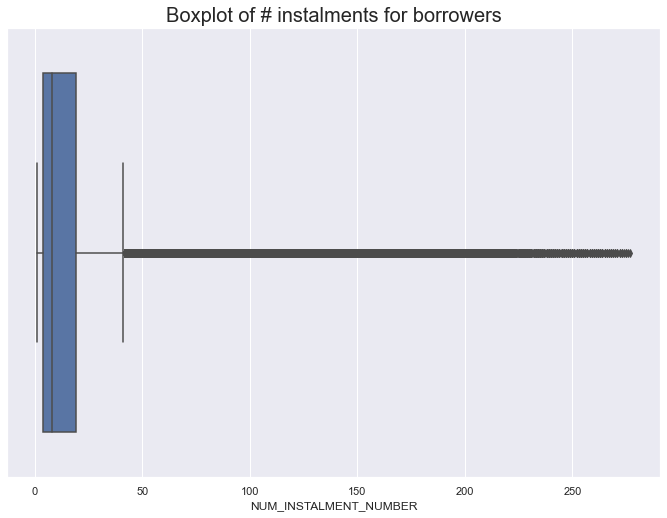

In [89]:
sns.boxplot(x=installment_payments["NUM_INSTALMENT_NUMBER"])
plt.title("Boxplot of # instalments for borrowers", fontsize=20)
plt.show()

Histogram presents upward trend. Seems that his feature has a normal distribution for this variable and its meaning (closer to zero - closer to today).

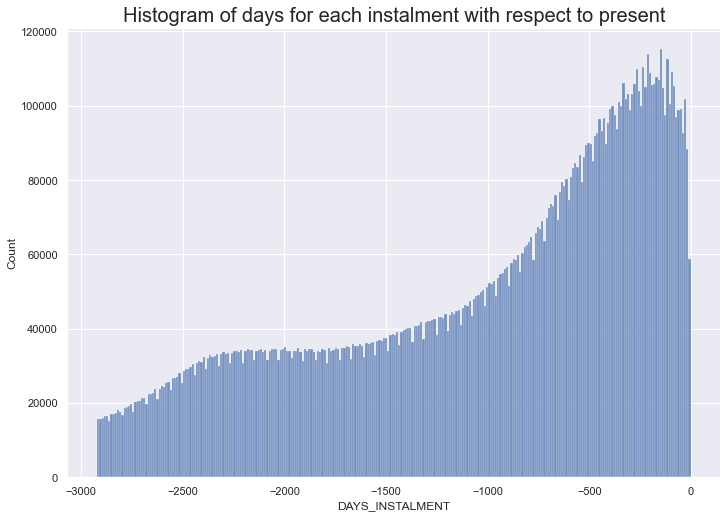

In [90]:
sns.histplot(data=installment_payments['DAYS_INSTALMENT'])
plt.title("Histogram of days for each instalment with respect to present", fontsize=20)
plt.show()

Histogram of entry payments days show splitting at roughly -3000, it suggests a handful of abnormal values below -3000.

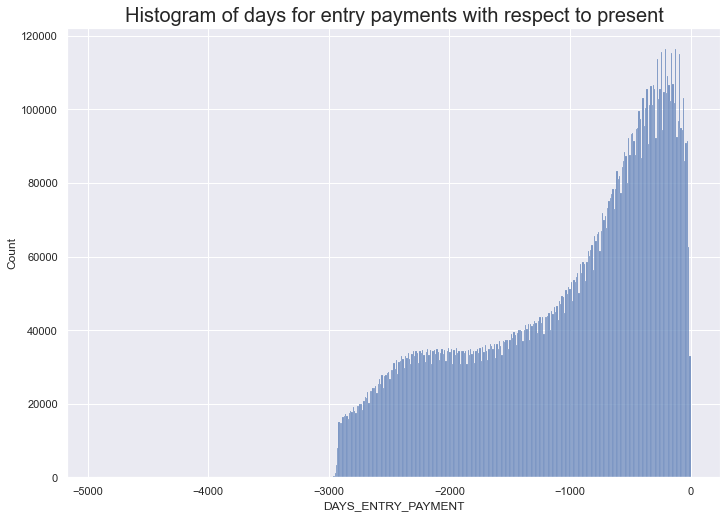

In [91]:
sns.histplot(data=installment_payments["DAYS_ENTRY_PAYMENT"])
plt.title("Histogram of days for entry payments with respect to present", fontsize=20)
plt.show()

We see there is a more than 90 values below 3000, however, if we dig deeper we see only one anomaly.

In [92]:
installment_payments.loc[installment_payments["DAYS_ENTRY_PAYMENT"] < -3000]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
60613,1044416,122917,1.0,1,-1770.0,-3026.0,2554.380,2554.380
150941,1277500,145966,1.0,5,-2912.0,-3021.0,4306.050,4306.050
155796,2585968,169968,1.0,3,-2919.0,-3002.0,9814.500,9814.500
177521,1270348,178655,1.0,7,-2908.0,-3011.0,2831.085,2831.085
532014,1520179,126179,1.0,5,-2921.0,-3007.0,3014.685,3014.685
...,...,...,...,...,...,...,...,...
12280108,1683917,421924,1.0,10,-2812.0,-3008.0,3343.095,3312.225
12602299,1634305,422233,1.0,5,-2919.0,-3061.0,2782.710,2782.710
12621913,2341742,421060,1.0,8,-2911.0,-3096.0,2867.310,2867.310
12797807,2272804,413710,1.0,7,-2909.0,-3007.0,4466.925,4466.925


This is the anomaly, with the value of -4921 which falls out in the distribution chart.

In [93]:
installment_payments.loc[installment_payments["DAYS_ENTRY_PAYMENT"] < -3500]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
11943247,1752167,447329,3.0,7,-1732.0,-4921.0,11401.335,11401.335


Replace this as a missing value to gain more solid distribution.

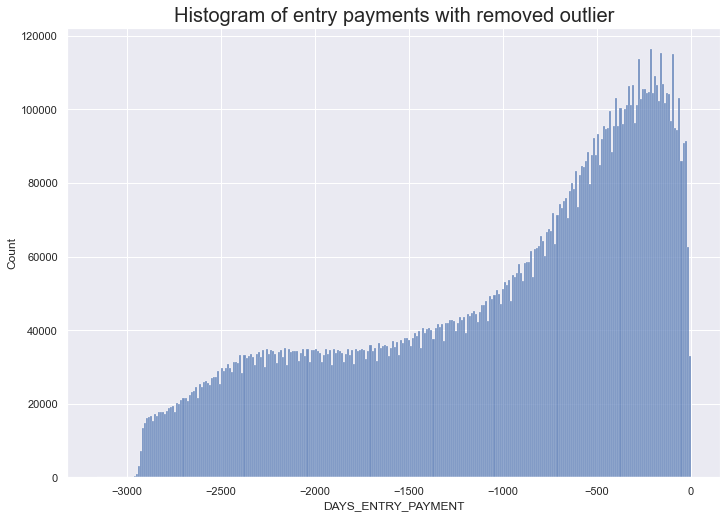

In [94]:
sns.histplot(
    data=installment_payments["DAYS_ENTRY_PAYMENT"].loc[
        installment_payments["DAYS_ENTRY_PAYMENT"] > -3500
    ]
)
plt.title("Histogram of entry payments with removed outlier", fontsize=20)
plt.show()

Regarding to extreme values of ```AMT_INSTALLMENT``` and ```AMT_PAYMENT``` nothing will be done since these will mainly be used for aggregations and by plotting few distribution and boxplots no significant anomalies were seen.

## Credit card balance

Data shows monthly data related to any or multiple Credit Cards that the applicant had with the Home Credit Group.
The table contains fields like balance, the credit limit, amount of drawings, etc. for each month of the credit card.

In [95]:
credit_card_balance = pd.read_csv('../home-credit-default-risk/credit_card_balance.csv')

In [96]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


**Decision is not to alter any outliers is reasoned by 3 arguments:**

Firstly, aggregations will be used for these features, thus it will partially take care of the outlier problem.

Secondly, large amount of rows makes outliers not so dangerous.

Thirdly, in processing stage alternatively more robust scalers will be considered.

In [97]:
credit_card_balance.describe().round().T.iloc[2:, 1:]

,mean,std,min,25%,50%,75%,max
MONTHS_BALANCE,-35.0,27.0,-96.0,-55.0,-28.0,-11.0,-1.0
AMT_BALANCE,58300.0,106307.0,-420250.0,0.0,0.0,89047.0,1505902.0
AMT_CREDIT_LIMIT_ACTUAL,153808.0,165146.0,0.0,45000.0,112500.0,180000.0,1350000.0
AMT_DRAWINGS_ATM_CURRENT,5961.0,28226.0,-6827.0,0.0,0.0,0.0,2115000.0
AMT_DRAWINGS_CURRENT,7433.0,33846.0,-6212.0,0.0,0.0,0.0,2287098.0
AMT_DRAWINGS_OTHER_CURRENT,288.0,8202.0,0.0,0.0,0.0,0.0,1529847.0
AMT_DRAWINGS_POS_CURRENT,2969.0,20797.0,0.0,0.0,0.0,0.0,2239274.0
AMT_INST_MIN_REGULARITY,3540.0,5600.0,0.0,0.0,0.0,6634.0,202882.0
AMT_PAYMENT_CURRENT,10281.0,36078.0,0.0,152.0,2703.0,9000.0,4289207.0
AMT_PAYMENT_TOTAL_CURRENT,7589.0,32006.0,0.0,0.0,0.0,6750.0,4278316.0


P.S. This rationale could be reconsidered after the modeling stage, in case any further score improvements will be seeked.

## Conclusion from EDA

1. Datasets should be merged on SK_ID_CURR to make the most sense of the data.
2. There were few features which showed unusuaul values, such as 'XNA' in gender or 365243 in time series.
3. Most of the data will only make sense through aggregations because one person could have multiple entries among all datasets.
4. Among features there is quite a few outliers from statistical perspective.
5. Vast amount of variables and variations for feature engineering.